In [1]:
import numpy as np
import acepacutils as apu
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Load in an example directory of PAC in 1D

In [2]:
path_pac1d = "/STER/thomasko/APU_examples_simulations/pac-for-1D/"
path_figsave = "/lhome/thomasko/Downloads/"

PAC1D = apu.PAC1D(path_pac1d, path_figsave)
print("\t with output nb:", PAC1D.get_converged_output_nb())

PAC1D.read_1D_pac()
# df = PAC1D.get_pac1d_df()

	 with output nb: 22


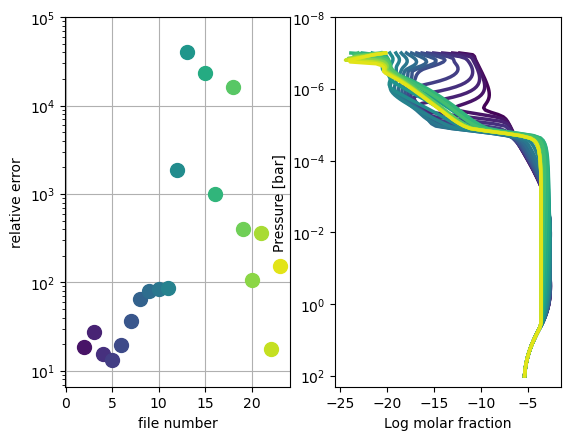

In [3]:
PAC1D.plot_convergence(molecules=["CH4"])

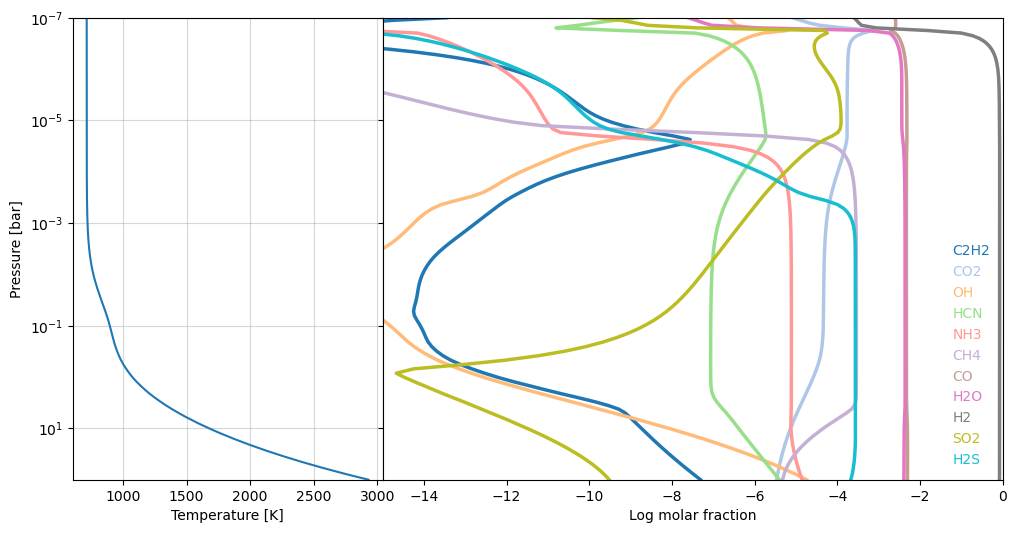

In [4]:
PAC1D.plot_chemistry()

In [5]:
# PAC1D.load_star_file()
# PAC1D.plot_star_spectrum()
# PAC1D.load_eddy_file()
# PAC1D.plot_eddy_diffusion()

# Set-up an atmosphere object for pRT

In [6]:
line_species = ['SO', 'C2H2', 'CO2',
                'OH', 'HCN', 'NH3',
                'CH4', 'CO', 'H2O',
                'H2S', 'SO2', "AlO"
               ]
rayleigh_species = ["He", "H2"]
cloud_species = ['Mg2SiO4(c)_cd']
continuum_opacities = ['H2-H2', 'H2-He']
wlen_bords_micron = [0.9, 20]

PRTATM = apu.PRT_ATM(line_species,
                    rayleigh_species,
                    cloud_species,
                    continuum_opacities,
                    wlen_bords_micron)

PRTATM.load_atmosphere_object()

  Read line opacities of SO...
 Done.
  Read line opacities of C2H2...
 Done.
  Read line opacities of CO2...
 Done.
  Read line opacities of OH...
 Done.
  Read line opacities of HCN...
 Done.
  Read line opacities of NH3...
 Done.
  Read line opacities of CH4...
 Done.
  Read line opacities of CO_all_iso_HITEMP...
 Done.
  Read line opacities of H2O_Exomol...
 Done.
  Read line opacities of H2S...
 Done.
  Read line opacities of SO2_ExoAmes...
 Done.
  Read line opacities of AlO...
 Done.

  Read in opacity of cloud species Mg2SiO4 ...
 Done.

  Read CIA opacities for H2-H2...
  Read CIA opacities for H2-He...
 Done.



# Create a transmission spectrum with petitRADTRANS
Based on the abundances simulated with the PAC chemistry code

In [7]:
################################################
################ Set the mass fractions
################################################
mf_additional = {
    'AlO': np.ones(PAC1D.resolution)*1e-15,
    'Mg2SiO4(c)': np.ones(PAC1D.resolution)*1e-15
}
PAC1D.set_mass_fractions(PRT_ATM=PRTATM, additional_massFractions=mf_additional)

################################################################
################ Compute the transmission spectrum
################################################################
radius = {}
radius['Mg2SiO4(c)'] = 1e-5 * np.ones(PAC1D.resolution)

PAC1D.compute_transmission_spectrum(
    ref_R=1,
    radius=radius
)

[-I] Succesfully computed the transmission spectrum


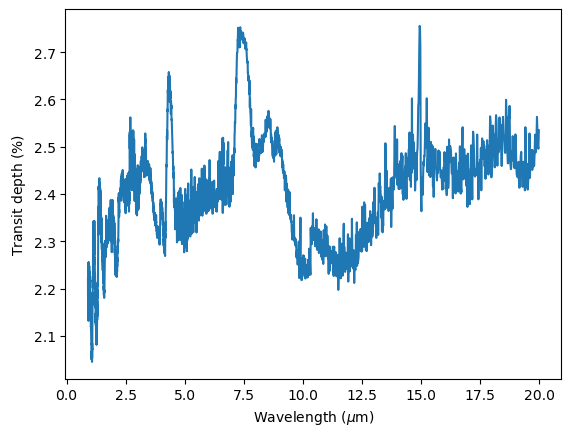

In [8]:
PAC1D.plot_transmission_spectrum()

# What is the effect of leaving SO2 out of the atmosphere?

[-I] Succesfully computed the transmission spectrum
[-I] Succesfully computed the transmission spectrum


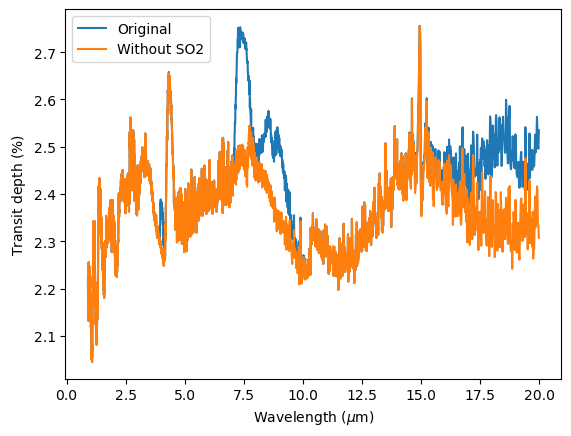

In [9]:
fig, ax = plt.subplots()

#Plot the original
PAC1D.set_mass_fractions(PRT_ATM=PRTATM, additional_massFractions=mf_additional)
PAC1D.compute_transmission_spectrum(ref_R=1,radius=radius)
PAC1D.plot_transmission_spectrum(ax=ax)


#Plot the spectrum without SO2
PAC1D.set_mass_fraction_to_zero(mols=["SO2"])
PAC1D.compute_transmission_spectrum(ref_R=1,radius=radius)
PAC1D.plot_transmission_spectrum(ax)

ax.legend(["Original", "Without SO2"])